In [1]:
import numpy as np
import pandas as pd

data_karyawan = pd.read_csv("kry.csv")
data_karyawan

,NIP,Nama,Umur,Masa Kerja,Gaji
0,ID01,Lia,30,6,750
1,ID02,Iwan,48,17,1500
2,ID03,Sari,36,14,1255
3,ID04,Andi,37,4,1040
4,ID05,Budi,42,12,950
5,ID06,Amir,39,13,1600
6,ID07,Rian,37,5,1250
7,ID08,Kiki,32,1,550
8,ID09,Alda,35,3,735
9,ID10,Yoga,25,2,860


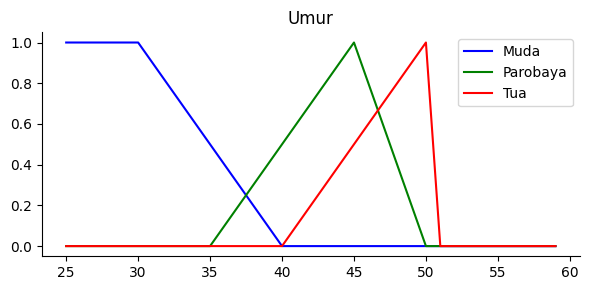

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz

def RangeSubject(_low, _high, _step):
    subject = np.arange(_low, _high, _step)
    return subject

def MembershipFunctionUmur(_rule, _range_subject, _title):
    lo = fuzz.trapmf(_range_subject, _rule[0])
    mi = fuzz.trapmf(_range_subject, _rule[1])
    hi = fuzz.trapmf(_range_subject, _rule[2])

    fig, ax = plt.subplots(nrows=1, figsize=(6,3))
    ax.plot(_range_subject, lo, 'b', linewidth=1.5, label="Muda")
    ax.plot(_range_subject, mi, 'g', linewidth=1.5, label="Parobaya")
    ax.plot(_range_subject, hi, 'r', linewidth=1.5, label="Tua")

    ax.set_title(_title)
    ax.legend()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    plt.tight_layout()
    plt.show()

    return lo, mi, hi

xumur = RangeSubject(25,60,1)
rumur = np.array([
      [0, 25, 30, 40],  
      [35, 45, 45, 50], 
      [40, 50, 50, 50]
])

lo_umur, mi_umur, hi_umur = MembershipFunctionUmur(rumur,xumur,'Umur')

In [3]:
def MembershipValueUmurDetail(_range, _lo,_mi,_hi,_nilai):
    lo = float(fuzz.interp_membership(_range,_lo,_nilai))
    mi = float(fuzz.interp_membership(_range,_mi,_nilai))
    hi = float(fuzz.interp_membership(_range,_hi,_nilai))
    
    return lo,mi,hi

umur_1 = data_karyawan['Umur'][0]
umur_2 = data_karyawan['Umur'][1]
umur_3 = data_karyawan['Umur'][2]
umur_4 = data_karyawan['Umur'][3]
umur_5 = data_karyawan['Umur'][4]
umur_6 = data_karyawan['Umur'][5]
umur_7 = data_karyawan['Umur'][6]
umur_8 = data_karyawan['Umur'][7]
umur_9 = data_karyawan['Umur'][8]
umur_10 = data_karyawan['Umur'][9]
  
umur_user_1 = MembershipValueUmurDetail(xumur, lo_umur, mi_umur, hi_umur, umur_1)
umur_user_2 = MembershipValueUmurDetail(xumur, lo_umur, mi_umur, hi_umur, umur_2)
umur_user_3 = MembershipValueUmurDetail(xumur, lo_umur, mi_umur, hi_umur, umur_3)
umur_user_4 = MembershipValueUmurDetail(xumur, lo_umur, mi_umur, hi_umur, umur_4)
umur_user_5 = MembershipValueUmurDetail(xumur, lo_umur, mi_umur, hi_umur, umur_5)
umur_user_6 = MembershipValueUmurDetail(xumur, lo_umur, mi_umur, hi_umur, umur_6)
umur_user_7 = MembershipValueUmurDetail(xumur, lo_umur, mi_umur, hi_umur, umur_7)
umur_user_8 = MembershipValueUmurDetail(xumur, lo_umur, mi_umur, hi_umur, umur_8)
umur_user_9 = MembershipValueUmurDetail(xumur, lo_umur, mi_umur, hi_umur, umur_9)
umur_user_10 = MembershipValueUmurDetail(xumur, lo_umur, mi_umur, hi_umur, umur_10)

print("Umur User 1 = ", umur_user_1)
print("Umur User 2 = ", umur_user_2)
print("Umur User 3 = ", umur_user_3)
print("Umur User 4 = ", umur_user_4)
print("Umur User 5 = ", umur_user_5)
print("Umur User 6 = ", umur_user_6)
print("Umur User 7 = ", umur_user_7)
print("Umur User 8 = ", umur_user_8)
print("Umur User 9 = ", umur_user_9)
print("Umur User 10 = ", umur_user_1)

Umur User 1 =  (1.0, 0.0, 0.0)
Umur User 2 =  (0.0, 0.4, 0.8)
Umur User 3 =  (0.4, 0.1, 0.0)
Umur User 4 =  (0.3, 0.2, 0.0)
Umur User 5 =  (0.0, 0.7, 0.2)
Umur User 6 =  (0.1, 0.4, 0.0)
Umur User 7 =  (0.3, 0.2, 0.0)
Umur User 8 =  (0.8, 0.0, 0.0)
Umur User 9 =  (0.5, 0.0, 0.0)
Umur User 10 =  (1.0, 0.0, 0.0)


In [5]:
def StatusUmur(_membership):
    status = ""
    if _membership[0] > _membership[1] and _membership[0] > _membership[2]:
      status = "Low"
    elif _membership[1] > _membership[0] and _membership[1] > _membership[2]:
      status= "Medium"
    elif _membership[2] > _membership[0] and _membership[2] > _membership[1]:
      status= "High"
    return status
  
status_umur_user_1 = StatusUmur(umur_user_1)
status_umur_user_2 = StatusUmur(umur_user_2)
status_umur_user_3 = StatusUmur(umur_user_3)
status_umur_user_4 = StatusUmur(umur_user_4)
status_umur_user_5 = StatusUmur(umur_user_5)
status_umur_user_6 = StatusUmur(umur_user_6)
status_umur_user_7 = StatusUmur(umur_user_7)
status_umur_user_8 = StatusUmur(umur_user_8)
status_umur_user_9 = StatusUmur(umur_user_9)
status_umur_user_10 = StatusUmur(umur_user_10)

print("Status Umur User 1 = ", status_umur_user_1)
print("Status Umur User 2 = ", status_umur_user_2)
print("Status Umur User 3 = ", status_umur_user_3)
print("Status Umur User 4 = ", status_umur_user_4)
print("Status Umur User 5 = ", status_umur_user_5)
print("Status Umur User 6 = ", status_umur_user_6)
print("Status Umur User 7 = ", status_umur_user_7)
print("Status Umur User 8 = ", status_umur_user_8)
print("Status Umur User 9 = ", status_umur_user_9)
print("Status Umur User 10 = ", status_umur_user_10)

Status Umur User 1 =  Low
Status Umur User 2 =  High
Status Umur User 3 =  Low
Status Umur User 4 =  Low
Status Umur User 5 =  Medium
Status Umur User 6 =  Medium
Status Umur User 7 =  Low
Status Umur User 8 =  Low
Status Umur User 9 =  Low
Status Umur User 10 =  Low


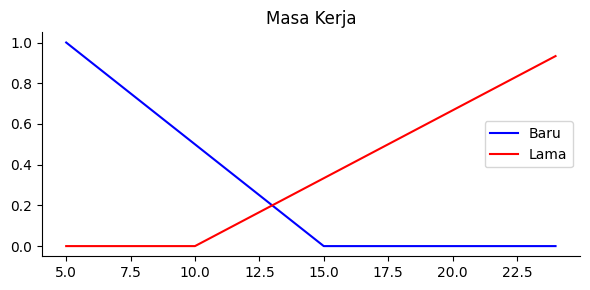

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

def RangeSubject(_low, _high, _step):
    subject = np.arange(_low, _high, _step)
    return subject

def MembershipFunctionMasaKerja(_rule, _range_subject, _title):
    lo = fuzz.trimf(_range_subject, _rule[0])
    hi = fuzz.trimf(_range_subject, _rule[1])

    fig, ax = plt.subplots(nrows=1, figsize=(6,3))
    ax.plot(_range_subject, lo, 'b', linewidth=1.5, label="Baru")
    ax.plot(_range_subject, hi, 'r', linewidth=1.5, label="Lama")

    ax.set_title(_title)
    ax.legend()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    plt.tight_layout()
    plt.show()

    return lo, hi
  
xmasakerja = RangeSubject(5,25,1)
rmasakerja = np.array([
      [0, 5, 15],  
      [10, 25, 25]
])

lo_masakerja,hi_masakerja = MembershipFunctionMasaKerja(rmasakerja, xmasakerja, 'Masa Kerja')

In [13]:
def MembershipValueMasaKerjaDetail(_range, _lo,_hi,_nilai):
    lo = float(fuzz.interp_membership(_range,_lo,_nilai))
    hi = float(fuzz.interp_membership(_range,_hi,_nilai))
    
    return lo,hi
  
masa_kerja_1 = data_karyawan['Masa Kerja'][0]
masa_kerja_2 = data_karyawan['Masa Kerja'][1]
masa_kerja_3 = data_karyawan['Masa Kerja'][2]
masa_kerja_4 = data_karyawan['Masa Kerja'][3]
masa_kerja_5 = data_karyawan['Masa Kerja'][4]
masa_kerja_6 = data_karyawan['Masa Kerja'][5]
masa_kerja_7 = data_karyawan['Masa Kerja'][6]
masa_kerja_8 = data_karyawan['Masa Kerja'][7]
masa_kerja_9 = data_karyawan['Masa Kerja'][8]
masa_kerja_10 = data_karyawan['Masa Kerja'][9]
  
masakerja_user_1 = MembershipValueMasaKerjaDetail(xmasakerja, lo_masakerja,hi_masakerja, masa_kerja_1)
masakerja_user_2 = MembershipValueMasaKerjaDetail(xmasakerja, lo_masakerja,hi_masakerja, masa_kerja_2)
masakerja_user_3 = MembershipValueMasaKerjaDetail(xmasakerja, lo_masakerja,hi_masakerja, masa_kerja_3)
masakerja_user_4 = MembershipValueMasaKerjaDetail(xmasakerja, lo_masakerja,hi_masakerja, masa_kerja_4)
masakerja_user_5 = MembershipValueMasaKerjaDetail(xmasakerja, lo_masakerja,hi_masakerja, masa_kerja_5)
masakerja_user_6 = MembershipValueMasaKerjaDetail(xmasakerja, lo_masakerja,hi_masakerja, masa_kerja_6)
masakerja_user_7 = MembershipValueMasaKerjaDetail(xmasakerja, lo_masakerja,hi_masakerja, masa_kerja_7)
masakerja_user_8 = MembershipValueMasaKerjaDetail(xmasakerja, lo_masakerja,hi_masakerja, masa_kerja_8)
masakerja_user_9 = MembershipValueMasaKerjaDetail(xmasakerja, lo_masakerja,hi_masakerja, masa_kerja_9)
masakerja_user_10 = MembershipValueMasaKerjaDetail(xmasakerja, lo_masakerja,hi_masakerja, masa_kerja_10)

print("Masa Kerja User 1 = ", masakerja_user_1)
print("Masa Kerja User 2 = ", masakerja_user_2)
print("Masa Kerja User 3 = ", masakerja_user_3)
print("Masa Kerja User 4 = ", masakerja_user_4)
print("Masa Kerja User 5 = ", masakerja_user_5)
print("Masa Kerja User 6 = ", masakerja_user_6)
print("Masa Kerja User 7 = ", masakerja_user_7)
print("Masa Kerja User 8 = ", masakerja_user_8)
print("Masa Kerja User 9 = ", masakerja_user_9)
print("Masa Kerja User 10 = ", masakerja_user_1)

Masa Kerja User 1 =  (0.9, 0.0)
Masa Kerja User 2 =  (0.0, 0.4666666666666667)
Masa Kerja User 3 =  (0.1, 0.26666666666666666)
Masa Kerja User 4 =  (0.0, 0.0)
Masa Kerja User 5 =  (0.3, 0.13333333333333333)
Masa Kerja User 6 =  (0.2, 0.2)
Masa Kerja User 7 =  (1.0, 0.0)
Masa Kerja User 8 =  (0.0, 0.0)
Masa Kerja User 9 =  (0.0, 0.0)
Masa Kerja User 10 =  (0.9, 0.0)


In [9]:
def StatusMasaKerja(_membership):
    status = ""
    if _membership[0] > _membership[1]:
      status = "Low"
    elif _membership[1] > _membership[0]:
      status= "High"
    return status
  
status_masa_kerja_user_1 = StatusMasaKerja(masakerja_user_1)
status_masa_kerja_user_2 = StatusMasaKerja(masakerja_user_2)
status_masa_kerja_user_3 = StatusMasaKerja(masakerja_user_3)
status_masa_kerja_user_4 = StatusMasaKerja(masakerja_user_4)
status_masa_kerja_user_5 = StatusMasaKerja(masakerja_user_5)
status_masa_kerja_user_6 = StatusMasaKerja(masakerja_user_6)
status_masa_kerja_user_7 = StatusMasaKerja(masakerja_user_7)
status_masa_kerja_user_8 = StatusMasaKerja(masakerja_user_8)
status_masa_kerja_user_9 = StatusMasaKerja(masakerja_user_9)
status_masa_kerja_user_10 = StatusMasaKerja(masakerja_user_10)

print("Status Masa Kerja User 1 = ", status_masa_kerja_user_1)
print("Status Masa Kerja User 2 = ", status_masa_kerja_user_2)
print("Status Masa Kerja User 3 = ", status_masa_kerja_user_3)
print("Status Masa Kerja User 4 = ", status_masa_kerja_user_4)
print("Status Masa Kerja User 5 = ", status_masa_kerja_user_5)
print("Status Masa Kerja User 6 = ", status_masa_kerja_user_6)
print("Status Masa Kerja User 7 = ", status_masa_kerja_user_7)
print("Status Masa Kerja User 8 = ", status_masa_kerja_user_8)
print("Status Masa Kerja User 9 = ", status_masa_kerja_user_9)
print("Status Masa Kerja User 10 = ", status_masa_kerja_user_10)

Status Masa Kerja User 1 =  Low
Status Masa Kerja User 2 =  High
Status Masa Kerja User 3 =  High
Status Masa Kerja User 4 =  
Status Masa Kerja User 5 =  Low
Status Masa Kerja User 6 =  
Status Masa Kerja User 7 =  Low
Status Masa Kerja User 8 =  
Status Masa Kerja User 9 =  
Status Masa Kerja User 10 =  


In [ ]:
def RuleBased(_status_umur, _status_masakerja):
    karyawan = ""
    if _status_umur == "Low" and _status_masakerja == "Low":
      karyawan = "Karyawan Bronze"
    elif _status_masakerja == "High":
      karyawan = "Karyawan Silver"
    elif _status_umur != "High" and _status_masakerja == "High":
      karyawan = "Karyawan Gold"
    elif _status_umur == "High" and _status_masakerja == "High":
      karyawan = "Karyawan Diamond"
    else:
      karyawan = "Karyawan Biasa"
      
    return karyawan

predikat_karyawan_1 = RuleBased(status_umur_user_1, status_masa_kerja_user_1)
predikat_karyawan_2 = RuleBased(status_umur_user_1, status_masa_kerja_user_1)

print("Predikat Karyawan User 1 = ", predikat_karyawan_1)


Predikat Karyawan User 1 =  Karyawan Bronze
Predikat Karyawan User 2 =  Karyawan Bronze


In [11]:
predikat_karyawan_1 = RuleBased(status_umur_user_1, status_masa_kerja_user_1)
predikat_karyawan_2 = RuleBased(status_umur_user_2, status_masa_kerja_user_2)
predikat_karyawan_3 = RuleBased(status_umur_user_3, status_masa_kerja_user_3)
predikat_karyawan_4 = RuleBased(status_umur_user_4, status_masa_kerja_user_4)
predikat_karyawan_5 = RuleBased(status_umur_user_5, status_masa_kerja_user_5)
predikat_karyawan_6 = RuleBased(status_umur_user_6, status_masa_kerja_user_6)
predikat_karyawan_7 = RuleBased(status_umur_user_7, status_masa_kerja_user_7)
predikat_karyawan_8 = RuleBased(status_umur_user_8, status_masa_kerja_user_8)
predikat_karyawan_9 = RuleBased(status_umur_user_9, status_masa_kerja_user_9)
predikat_karyawan_10 = RuleBased(status_umur_user_10, status_masa_kerja_user_10)

print("Predikat Karyawan User 1 = ", predikat_karyawan_1)
print("Predikat Karyawan User 2 = ", predikat_karyawan_2)
print("Predikat Karyawan User 3 = ", predikat_karyawan_3)
print("Predikat Karyawan User 4 = ", predikat_karyawan_4)
print("Predikat Karyawan User 5 = ", predikat_karyawan_5)
print("Predikat Karyawan User 6 = ", predikat_karyawan_6)
print("Predikat Karyawan User 7 = ", predikat_karyawan_7)
print("Predikat Karyawan User 8 = ", predikat_karyawan_8)
print("Predikat Karyawan User 9 = ", predikat_karyawan_9)
print("Predikat Karyawan User 10 = ", predikat_karyawan_10)


Predikat Karyawan User 1 =  Karyawan Bronze
Predikat Karyawan User 2 =  Karyawan Silver
Predikat Karyawan User 3 =  Karyawan Silver
Predikat Karyawan User 4 =  Karyawan Biasa
Predikat Karyawan User 5 =  Karyawan Biasa
Predikat Karyawan User 6 =  Karyawan Biasa
Predikat Karyawan User 7 =  Karyawan Bronze
Predikat Karyawan User 8 =  Karyawan Biasa
Predikat Karyawan User 9 =  Karyawan Biasa
Predikat Karyawan User 10 =  Karyawan Biasa


In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definisikan variabel input
permintaan = ctrl.Antecedent(np.arange(0, 5001, 1), 'permintaan')
persediaan = ctrl.Antecedent(np.arange(0, 1001, 1), 'persediaan')
produksi = ctrl.Consequent(np.arange(0, 5001, 1), 'produksi')

# Fungsi keanggotaan untuk permintaan
permintaan['rendah'] = fuzz.trimf(permintaan.universe, [0, 0, 2500])
permintaan['sedang'] = fuzz.trimf(permintaan.universe, [0, 2500, 5000])
permintaan['tinggi'] = fuzz.trimf(permintaan.universe, [2500, 5000, 5000])

# Fungsi keanggotaan untuk persediaan
persediaan['sedikit'] = fuzz.trimf(persediaan.universe, [0, 0, 500])
persediaan['sedang'] = fuzz.trimf(persediaan.universe, [0, 500, 1000])
persediaan['banyak'] = fuzz.trimf(persediaan.universe, [500, 1000, 1000])

# Fungsi keanggotaan untuk produksi
produksi['kurang'] = fuzz.trimf(produksi.universe, [0, 0, 2500])
produksi['sedang'] = fuzz.trimf(produksi.universe, [0, 2500, 5000])
produksi['banyak'] = fuzz.trimf(produksi.universe, [2500, 5000, 5000])

# Aturan fuzzy
rule1 = ctrl.Rule(permintaan['tinggi'] & persediaan['sedikit'], produksi['banyak'])
rule2 = ctrl.Rule(permintaan['tinggi'] & persediaan['banyak'], produksi['sedang'])
rule3 = ctrl.Rule(permintaan['rendah'] & persediaan['sedikit'], produksi['sedang'])
rule4 = ctrl.Rule(permintaan['rendah'] & persediaan['banyak'], produksi['kurang'])

# Sistem kontrol dengan metode Tsukamoto
produksi_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
produksi_simulasi = ctrl.ControlSystemSimulation(produksi_ctrl)

# Input variabel
produksi_simulasi.input['permintaan'] = 2500
produksi_simulasi.input['persediaan'] = 500

# Hitung output
produksi_simulasi.compute()

# Menampilkan output hasil perhitungan
print("Output Produksi (Tsukamoto) = {:.2f}".format(produksi_simulasi.output['produksi']))


KeyError: 'produksi'

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

permintaan = ctrl.Antecedent(np.arange(0, 3501, 1), 'permintaan')
persediaan = ctrl.Antecedent(np.arange(0, 501, 1), 'persediaan')
kemasan_produksi = ctrl.Consequent(np.arange(0, 3001, 1), 'kemasan_produksi')

permintaan['sedikit'] = fuzz.trapmf(permintaan.universe, [0, 0, 500, 1000])
permintaan['sedang'] = fuzz.trimf(permintaan.universe, [500, 1500, 2500])
permintaan['banyak'] = fuzz.trapmf(permintaan.universe, [2000, 2500, 3500, 3500])

persediaan['sedikit'] = fuzz.trapmf(persediaan.universe, [0, 0, 100, 200])
persediaan['sedang'] = fuzz.trimf(persediaan.universe, [100, 200, 300])
persediaan['banyak'] = fuzz.trapmf(persediaan.universe, [250, 350, 500, 500])

kemasan_produksi['sedikit'] = fuzz.trapmf(kemasan_produksi.universe, [0, 0, 500, 1000])
kemasan_produksi['sedang'] = fuzz.trimf(kemasan_produksi.universe, [500, 1500, 2000])
kemasan_produksi['banyak'] = fuzz.trapmf(kemasan_produksi.universe, [1500, 2000, 3000, 3000])

rule1 = ctrl.Rule(permintaan['sedikit'] & persediaan['banyak'], kemasan_produksi['sedikit'])
rule2 = ctrl.Rule(permintaan['sedikit'] & persediaan['sedang'], kemasan_produksi['sedang'])
rule3 = ctrl.Rule(permintaan['sedikit'] & persediaan['sedikit'], kemasan_produksi['banyak'])

rule4 = ctrl.Rule(permintaan['sedang'] & persediaan['banyak'], kemasan_produksi['sedikit'])
rule5 = ctrl.Rule(permintaan['sedang'] & persediaan['sedang'], kemasan_produksi['sedang'])
rule6 = ctrl.Rule(permintaan['sedang'] & persediaan['sedikit'], kemasan_produksi['banyak'])

rule7 = ctrl.Rule(permintaan['banyak'] & persediaan['banyak'], kemasan_produksi['sedikit'])
rule8 = ctrl.Rule(permintaan['banyak'] & persediaan['sedang'], kemasan_produksi['sedang'])
rule9 = ctrl.Rule(permintaan['banyak'] & persediaan['sedikit'], kemasan_produksi['banyak'])

kemasan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

kemasan = ctrl.ControlSystemSimulation(kemasan_ctrl)

kemasan.input['permintaan'] = 2500
kemasan.input['persediaan'] = 500

kemasan.compute()

print(f"Jumlah kemasan yang harus diproduksi: {kemasan.output['kemasan_produksi']}")

Jumlah kemasan yang harus diproduksi: 388.8888888888889


In [3]:
def nilai_keanggotaan_permintaan(x):
    turun = 0
    naik = 0
    
    if x <= 1000:
        turun = 1
        naik = 0
    elif x >= 5000:
        turun = 0
        naik = 1
    else:
        turun = (5000 - x) / (5000 - 1000)
        naik = (x - 1000) / (5000 - 1000)
    
    return turun, naik

def nilai_keanggotaan_persediaan(x):
    sedikit = 0
    banyak = 0
    
    if x <= 100:
        sedikit = 1
        banyak = 0
    elif x >= 600:
        sedikit = 0
        banyak = 1
    else:
        sedikit = (600 - x) / (600 - 100)
        banyak = (x - 100) / (600 - 100)
    
    return sedikit, banyak

def nilai_z_produksi(alpha, status):
    if status == "berkurang":
        return 7000 - (alpha * (7000 - 2000))
    else:
        return (alpha * (7000 - 2000)) + 2000

def fuzzy_tsukamoto(permintaan, persediaan):
    turun, naik = nilai_keanggotaan_permintaan(permintaan)
    sedikit, banyak = nilai_keanggotaan_persediaan(persediaan)
    
    aturan = [
        (min(turun, banyak), "berkurang"),
        (min(turun, sedikit), "berkurang"),
        (min(naik, banyak), "bertambah"),
        (min(naik, sedikit), "bertambah")
    ]
    
    z_total = 0
    alpha_total = 0
    
    for alpha, status in aturan:
        if alpha > 0:
            z = nilai_z_produksi(alpha, status)
            z_total += alpha * z
            alpha_total += alpha
    
    if alpha_total == 0:
        return 0
        
    z_akhir = z_total / alpha_total
    return z_akhir

permintaan = 2500
persediaan = 500

hasil_produksi = fuzzy_tsukamoto(permintaan, persediaan)
print(f"Jumlah Permintaan: {permintaan}")
print(f"Jumlah Persediaan: {persediaan}")
print(f"Jumlah yang harus diproduksi: {hasil_produksi:.2f} unit")

Jumlah Permintaan: 2500
Jumlah Persediaan: 500
Jumlah yang harus diproduksi: 4053.57 unit


In [4]:
import numpy as np

def permintaan_rendah(x):
    if x <= 1000:
        return 1
    elif 1000 < x <= 5000:
        return (5000 - x) / 4000
    else:
        return 0

def permintaan_tinggi(x):
    if x <= 1000:
        return 0
    elif 1000 < x <= 5000:
        return (x - 1000) / 4000
    else:
        return 1

def persediaan_sedikit(x):
    if x <= 100:
        return 1
    elif 100 < x <= 600:
        return (600 - x) / 500
    else:
        return 0

def persediaan_banyak(x):
    if x <= 100:
        return 0
    elif 100 < x <= 600:
        return (x - 100) / 500
    else:
        return 1

def inferensi_sugeno(permintaan, persediaan):
    pmt_rendah = permintaan_rendah(permintaan)
    pmt_tinggi = permintaan_tinggi(permintaan)
    psd_sedikit = persediaan_sedikit(persediaan)
    psd_banyak = persediaan_banyak(persediaan)
    
    rules = [
        min(pmt_rendah, psd_banyak) * 2000,
        min(pmt_tinggi, psd_banyak) * 4000,
        min(pmt_rendah, psd_sedikit) * 3000,
        min(pmt_tinggi, psd_sedikit) * 7000
    ]
    
    bobot = [
        min(pmt_rendah, psd_banyak),
        min(pmt_tinggi, psd_banyak),
        min(pmt_rendah, psd_sedikit),
        min(pmt_tinggi, psd_sedikit)
    ]
    
    total_produksi = sum(rules)
    total_bobot = sum(bobot)
    
    if total_bobot == 0:
        return 0
        
    hasil_produksi = total_produksi / total_bobot
    return hasil_produksi

permintaan = 2500
persediaan = 500

hasil = inferensi_sugeno(permintaan, persediaan)
print(f"Jumlah Permintaan: {permintaan}")
print(f"Jumlah Persediaan: {persediaan}")
print(f"Jumlah yang harus diproduksi: {hasil:.2f} unit")

Jumlah Permintaan: 2500
Jumlah Persediaan: 500
Jumlah yang harus diproduksi: 3392.86 unit


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

permintaan = ctrl.Antecedent(np.arange(0, 5001, 1), 'permintaan')
persediaan = ctrl.Antecedent(np.arange(0, 1001, 1), 'persediaan')
produksi = ctrl.Consequent(np.arange(0, 5001, 1), 'produksi')

permintaan['rendah'] = fuzz.trimf(permintaan.universe, [0, 0, 2500])
permintaan['sedang'] = fuzz.trimf(permintaan.universe, [1000, 2500, 4000])
permintaan['tinggi'] = fuzz.trimf(permintaan.universe, [2500, 5000, 5000])

persediaan['sedikit'] = fuzz.trimf(persediaan.universe, [0, 0, 500])
persediaan['sedang'] = fuzz.trimf(persediaan.universe, [100, 500, 900])
persediaan['banyak'] = fuzz.trimf(persediaan.universe, [500, 1000, 1000])

produksi['berkurang'] = fuzz.trimf(produksi.universe, [0, 0, 2500])
produksi['sedang'] = fuzz.trimf(produksi.universe, [1000, 2500, 4000])
produksi['bertambah'] = fuzz.trimf(produksi.universe, [2500, 5000, 5000])

aturan1 = ctrl.Rule(permintaan['tinggi'] & persediaan['sedikit'], produksi['bertambah'])
aturan2 = ctrl.Rule(permintaan['tinggi'] & persediaan['sedang'], produksi['bertambah'])
aturan3 = ctrl.Rule(permintaan['tinggi'] & persediaan['banyak'], produksi['sedang'])
aturan4 = ctrl.Rule(permintaan['sedang'] & persediaan['sedikit'], produksi['bertambah'])
aturan5 = ctrl.Rule(permintaan['sedang'] & persediaan['sedang'], produksi['sedang'])
aturan6 = ctrl.Rule(permintaan['sedang'] & persediaan['banyak'], produksi['berkurang'])
aturan7 = ctrl.Rule(permintaan['rendah'] & persediaan['sedikit'], produksi['sedang'])
aturan8 = ctrl.Rule(permintaan['rendah'] & persediaan['sedang'], produksi['berkurang'])
aturan9 = ctrl.Rule(permintaan['rendah'] & persediaan['banyak'], produksi['berkurang'])

sistem_kontrol = ctrl.ControlSystem([aturan1, aturan2, aturan3, aturan4, aturan5, aturan6, aturan7, aturan8, aturan9])
sistem = ctrl.ControlSystemSimulation(sistem_kontrol)

sistem.input['permintaan'] = 2500
sistem.input['persediaan'] = 500

sistem.compute()

print(f"Jumlah produksi yang direkomendasikan: {sistem.output['produksi']:.2f} unit")

hasil_permintaan = fuzz.interp_membership(permintaan.universe, permintaan['tinggi'].mf, 2500)
hasil_persediaan = fuzz.interp_membership(persediaan.universe, persediaan['sedang'].mf, 500)

print(f"\nDerajat keanggotaan:")
print(f"Permintaan (2500) pada himpunan tinggi: {hasil_permintaan:.2f}")
print(f"Persediaan (500) pada himpunan sedang: {hasil_persediaan:.2f}")

Jumlah produksi yang direkomendasikan: 2500.00 unit

Derajat keanggotaan:
Permintaan (2500) pada himpunan tinggi: 0.00
Persediaan (500) pada himpunan sedang: 1.00


In [ ]:
def nilai_keanggotaan_turun(x, a, b):
    if x <= a:
        return 1
    elif x >= b:
        return 0
    else:
        return (b - x) / (b - a)

def nilai_keanggotaan_naik(x, a, b):
    if x <= a:
        return 0
    elif x >= b:
        return 1
    else:
        return (x - a) / (b - a)

def hitung_produksi_tsukamoto(permintaan, persediaan):
    permintaan_turun = nilai_keanggotaan_turun(permintaan, 1000, 5000)
    permintaan_naik = nilai_keanggotaan_naik(permintaan, 1000, 5000)
    
    persediaan_sedikit = nilai_keanggotaan_turun(persediaan, 100, 600)
    persediaan_banyak = nilai_keanggotaan_naik(persediaan, 100, 600)
    
    alfa_1 = min(permintaan_turun, persediaan_banyak)
    alfa_2 = min(permintaan_turun, persediaan_sedikit)
    alfa_3 = min(permintaan_naik, persediaan_banyak)
    alfa_4 = min(permintaan_naik, persediaan_sedikit)
    
    z1 = 7000 - (alfa_1 * (7000 - 2000))
    z2 = 7000 - (alfa_2 * (7000 - 2000))
    z3 = 2000 + (alfa_3 * (7000 - 2000))
    z4 = 2000 + (alfa_4 * (7000 - 2000))
    total_produksi = ((alfa_1 * z1) + (alfa_2 * z2) + (alfa_3 * z3) + (alfa_4 * z4)) / (alfa_1 + alfa_2 + alfa_3 + alfa_4)
    return total_produksi

permintaan = 2500
persediaan = 500
hasil = hitung_produksi_tsukamoto(permintaan, persediaan)

print(f"Permintaan = {permintaan}")
print(f"Persediaan = {persediaan}")
print(f"Jumlah produksi = {hasil:.2f} kemasan")

Permintaan = 2500
Persediaan = 500
Jumlah produksi = 4053.57 kemasan


In [ ]:
def derajat_keanggotaan_permintaan_turun(x):
    if x >= 5000:
        return 0
    elif x <= 1000:
        return 1
    else:
        return (5000 - x) / (5000 - 1000)

def derajat_keanggotaan_permintaan_naik(x):
    if x >= 5000:
        return 1
    elif x <= 1000:
        return 0
    else:
        return (x - 1000) / (5000 - 1000)

def derajat_keanggotaan_persediaan_sedikit(x):
    if x >= 600:
        return 0
    elif x <= 100:
        return 1
    else:
        return (600 - x) / (600 - 100)

def derajat_keanggotaan_persediaan_banyak(x):
    if x >= 600:
        return 1
    elif x <= 100:
        return 0
    else:
        return (x - 100) / (600 - 100)

def hitung_produksi_sugeno(permintaan, persediaan):
    permintaan_turun = derajat_keanggotaan_permintaan_turun(permintaan)
    permintaan_naik = derajat_keanggotaan_permintaan_naik(permintaan)
    persediaan_sedikit = derajat_keanggotaan_persediaan_sedikit(persediaan)
    persediaan_banyak = derajat_keanggotaan_persediaan_banyak(persediaan)
    z1 = 7000 
    z2 = 2000 
    alpha1 = min(permintaan_turun, persediaan_banyak)  
    alpha2 = min(permintaan_turun, persediaan_sedikit)  
    alpha3 = min(permintaan_naik, persediaan_banyak)
    alpha4 = min(permintaan_naik, persediaan_sedikit)
    z = ((alpha1 * z2) + (alpha2 * z2) + (alpha3 * z1) + (alpha4 * z1)) / (alpha1 + alpha2 + alpha3 + alpha4)
    return round(z)

permintaan = 2500
persediaan = 500
produksi = hitung_produksi_sugeno(permintaan, persediaan)
print(f"Jumlah produksi yang direkomendasikan: {produksi} kemasan")

Jumlah produksi yang direkomendasikan: 4054 kemasan


In [ ]:
import numpy as np

def keanggotaan_permintaan(x):
    turun = max(min((5000 - x)/(5000 - 1000), 1), 0)
    naik = max(min((x - 1000)/(5000 - 1000), 1), 0)
    return turun, naik

def keanggotaan_persediaan(x):
    sedikit = max(min((600 - x)/(600 - 100), 1), 0)
    banyak = max(min((x - 100)/(600 - 100), 1), 0)
    return sedikit, banyak

def keanggotaan_produksi(x):
    berkurang = max(min((7000 - x)/(7000 - 2000), 1), 0)
    bertambah = max(min((x - 2000)/(7000 - 2000), 1), 0)
    return berkurang, bertambah

def fuzzy_mamdani(permintaan, persediaan):
    permintaan_turun, permintaan_naik = keanggotaan_permintaan(permintaan)
    persediaan_sedikit, persediaan_banyak = keanggotaan_persediaan(persediaan)

    alpha_1 = min(permintaan_turun, persediaan_banyak)
    alpha_2 = min(permintaan_turun, persediaan_sedikit)
    alpha_3 = min(permintaan_naik, persediaan_banyak)
    alpha_4 = min(permintaan_naik, persediaan_sedikit)
    
    z1 = 7000 - alpha_1 * (7000 - 2000)
    z2 = 7000 - alpha_2 * (7000 - 2000)
    z3 = 2000 + alpha_3 * (7000 - 2000)
    z4 = 2000 + alpha_4 * (7000 - 2000)
    
    if (alpha_1 + alpha_2 + alpha_3 + alpha_4) == 0:
        return 0
    
    z = (alpha_1*z1 + alpha_2*z2 + alpha_3*z3 + alpha_4*z4)/(alpha_1 + alpha_2 + alpha_3 + alpha_4)
    return round(z)

permintaan = 2500
persediaan = 500
jumlah_produksi = fuzzy_mamdani(permintaan, persediaan)

print(f"Dengan permintaan {permintaan} dan persediaan {persediaan}")
print(f"Jumlah yang harus diproduksi adalah {jumlah_produksi} kemasan")

Dengan permintaan 2500 dan persediaan 500
Jumlah yang harus diproduksi adalah 4054 kemasan
